# Classical ML Project — Gym Activity

Link for the dataset - https://drive.google.com/drive/folders/1tBzm5Q8h4EfnaVWYnp9jfyUooMPLgctU?usp=sharing

**Part 1 (continued):** Data Loading & Exploratory Data Analysis (EDA)

Goals for this section:
- Load the CSV dataset
- Peek at the data structure and basic statistics
- Find missing values, types, and target variable distributions
- Produce simple visualizations that will inform preprocessing and feature selection

In [1]:
# Imports — all libraries used in the project

# Basic tools for working with numbers and tables
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn utilities for ML workflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Metrics for evaluating regression and classification models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Feature selection methods
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

# Keep notebook output cleaner
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

data_path = "gym_members_exercise_tracking.csv"
df = pd.read_csv(data_path)
print("Dataset shape:", df.shape)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()

Dataset shape: (973, 15)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34,Male,71.9,1.64,170,134,67,1.26,929.0,Cardio,21.3,2.1,4,2,26.73
1,48,Male,83.9,1.82,176,149,70,1.90,1401.0,HIIT,13.1,3.5,5,3,25.33
2,49,Male,79.2,1.72,194,128,69,1.46,925.0,Yoga,29.9,3.3,3,1,26.77
3,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17
4,32,Male,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55


In [3]:
# Missing Values Check

# Count how many missing values are in each column
missing_counts = df.isnull().sum()

# Convert to a small table with both count and percentage
missing_table = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': (missing_counts / len(df) * 100).round(2)
})

print("Missing Values Summary:")
missing_table.sort_values('missing_count', ascending=False)

Missing Values Summary:


,missing_count,missing_percent
Age,0,0.0
Gender,0,0.0
Weight (kg),0,0.0
Height (m),0,0.0
Max_BPM,0,0.0
Avg_BPM,0,0.0
Resting_BPM,0,0.0
Session_Duration (hours),0,0.0
Calories_Burned,0,0.0
Workout_Type,0,0.0


In [4]:
print("\nData Types")
df.dtypes


Data Types


Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [5]:
print("\nNumerical Summary")
df.describe().T   # statistics for numeric columns


Numerical Summary


,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [6]:
print("\nCategorical Summary")
df.select_dtypes(include=['object', 'category']).describe().T


Categorical Summary


,count,unique,top,freq
Gender,973,2,Male,511
Workout_Type,973,4,Strength,258


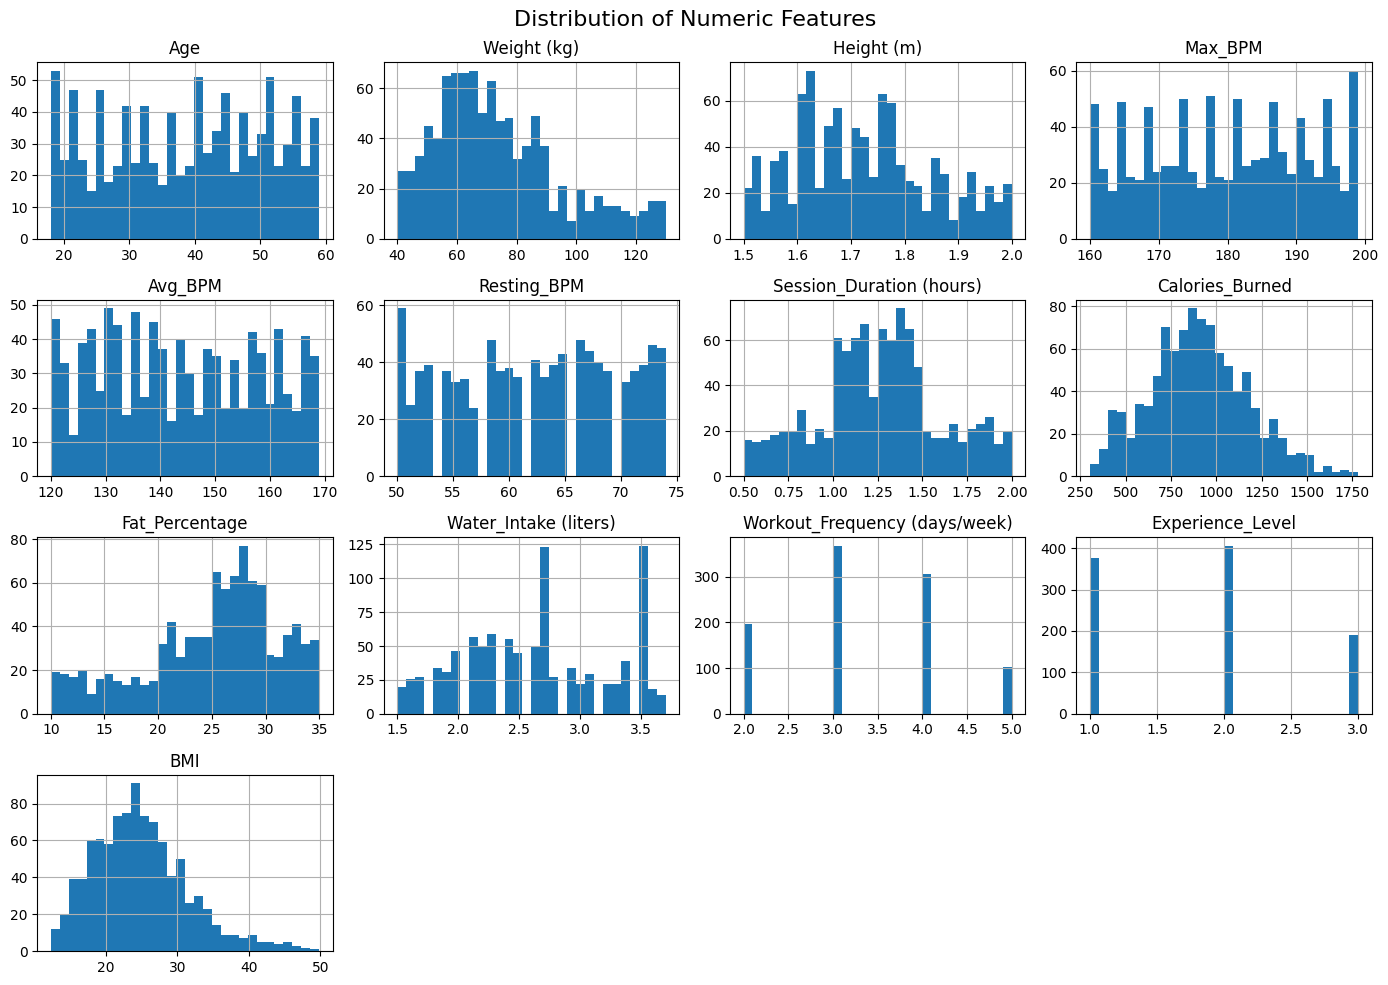

In [7]:
# Numeric Feature Distributions

numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot histograms for all numeric columns
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

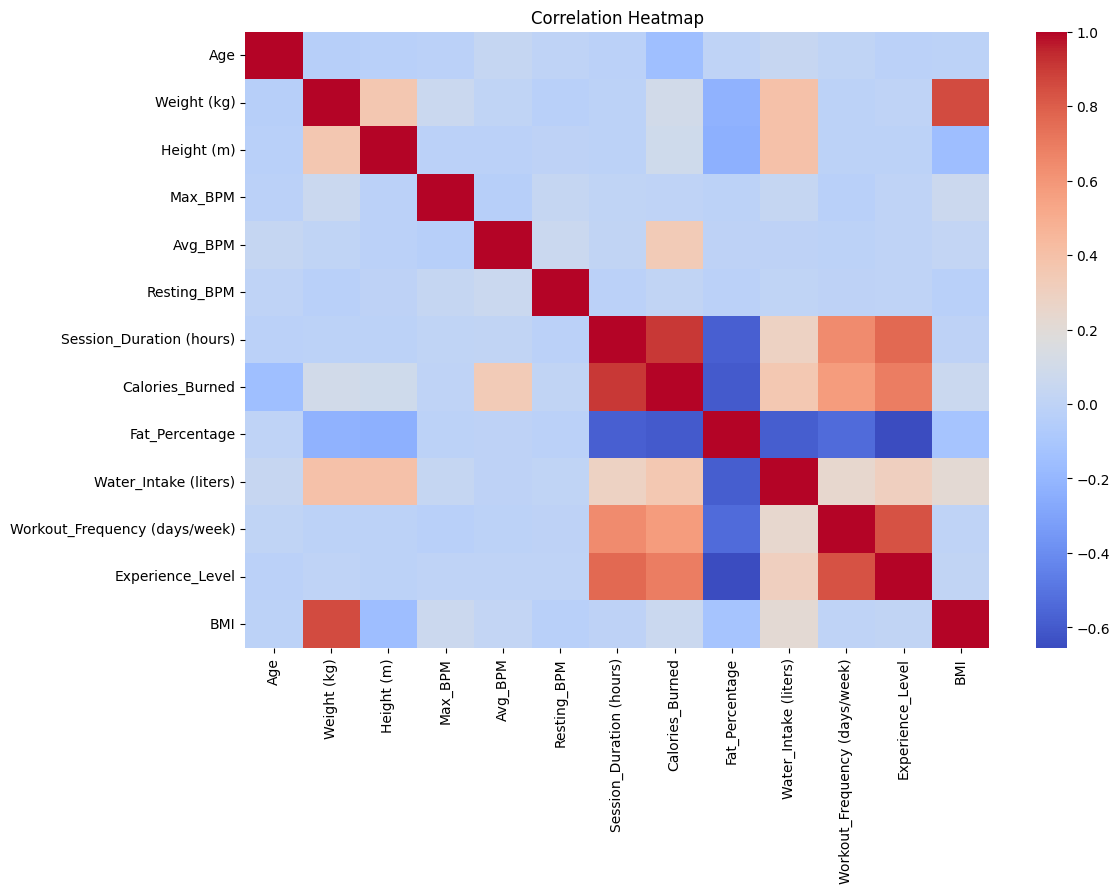

In [8]:
# Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Categorical Feature Overview

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))


Column: Gender
Gender
Male      511
Female    462
Name: count, dtype: int64

Column: Workout_Type
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


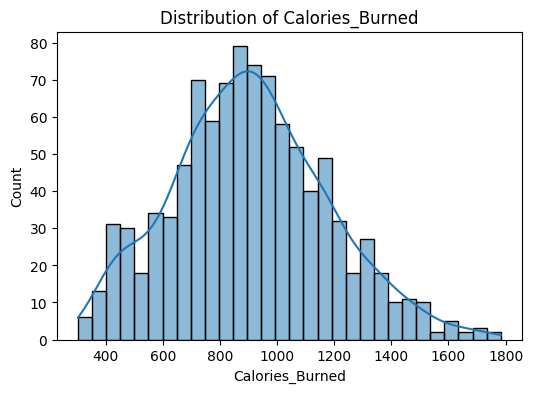

In [10]:
# Regression Target Distribution

plt.figure(figsize=(6, 4))
sns.histplot(df['Calories_Burned'], bins=30, kde=True)
plt.title("Distribution of Calories_Burned")
plt.show()


Class distribution:
Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64


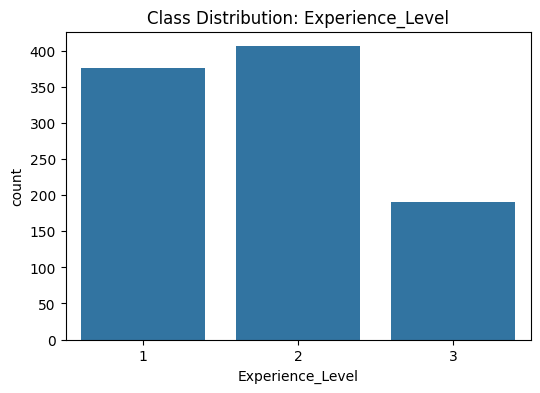

In [11]:
# Classification Target Distribution

print("\nClass distribution:")
print(df['Experience_Level'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Experience_Level')
plt.title("Class Distribution: Experience_Level")
plt.show()

## Part 2 - Data Preprocessing

This includes:
- Handling missing values
- Splitting regression/classification pipelines
- Encoding categorical features
- Scaling numeric features
- Preparing final training data

In [12]:
# 1. Define targets explicitly
reg_target = "Calories_Burned"
class_target = "Experience_Level"

print("Regression target:", reg_target)
print("Classification target:", class_target)

Regression target: Calories_Burned
Classification target: Experience_Level


In [13]:
# 2. Identify numeric and categorical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
Categorical columns: ['Gender', 'Workout_Type']


In [14]:
# 3. Remove rows with missing target values
df = df.dropna(subset=[reg_target, class_target])
print("Dataset shape after removing missing target rows:", df.shape)

Dataset shape after removing missing target rows: (973, 15)


In [15]:
# 4. Basic missing value imputation
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

In [16]:
# 5. Encode classification target
class_mapping = {label: idx for idx, label in enumerate(df[class_target].unique())}
df[class_target] = df[class_target].map(class_mapping)

print("Class mapping:", class_mapping)

Class mapping: {np.int64(2): 0, np.int64(3): 1, np.int64(1): 2}


In [17]:
# 6. Build X and y safely

# REGRESSION
y_reg = df[reg_target]
X_reg = df.drop(columns=[reg_target, class_target])

# CLASSIFICATION
y_clf = df[class_target]
X_clf = df.drop(columns=[class_target, reg_target])

In [18]:
# 7. Train / Val / Test Split (70/15/15)

# Regression split
X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X_reg, y_reg, test_size=0.30, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.50, random_state=42)

# Classification split (stratified)
X_train_clf, X_temp_clf, y_train_clf, y_temp_clf = train_test_split(X_clf, y_clf, test_size=0.30, random_state=42, stratify=y_clf)
X_val_clf, X_test_clf, y_val_clf, y_test_clf = train_test_split(X_temp_clf, y_temp_clf, test_size=0.50, random_state=42, stratify=y_temp_clf)

print("Regression split:", X_train_reg.shape, X_val_reg.shape, X_test_reg.shape)
print("Classification split:", X_train_clf.shape, X_val_clf.shape, X_test_clf.shape)

Regression split: (681, 13) (146, 13) (146, 13)
Classification split: (681, 13) (146, 13) (146, 13)


In [19]:
# 8. Build preprocessing pipeline

# Re-identify columns from training data only
numeric_cols = X_train_reg.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train_reg.select_dtypes(include=['object', 'category']).columns.tolist()

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, numeric_cols), ("cat", cat_transformer, categorical_cols)])

In [20]:
# 9. Fit-transform regression data
preprocessor_reg = preprocessor.fit(X_train_reg)

X_train_reg_processed = preprocessor_reg.transform(X_train_reg)
X_val_reg_processed   = preprocessor_reg.transform(X_val_reg)
X_test_reg_processed  = preprocessor_reg.transform(X_test_reg)

In [21]:
# 10. Fit-transform classification data
preprocessor_clf = preprocessor.fit(X_train_clf)

X_train_clf_processed = preprocessor_clf.transform(X_train_clf)
X_val_clf_processed   = preprocessor_clf.transform(X_val_clf)
X_test_clf_processed  = preprocessor_clf.transform(X_test_clf)

## Part 3 - Regression Models

Implementing 3 ML models: Linear Regression, Random Forest and XGBoost

In [22]:
# Regression Metrics Helper

def reg_metrics(y_true, y_pred):
    """Compute common regression metrics."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [23]:
# 1) Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_processed, y_train_reg)

# Validate
val_pred_lin = lin_reg.predict(X_val_reg_processed)
test_pred_lin = lin_reg.predict(X_test_reg_processed)

# Metrics
lin_val_metrics = reg_metrics(y_val_reg, val_pred_lin)
lin_test_metrics = reg_metrics(y_test_reg, test_pred_lin)

print("Linear Regression - Validation:", lin_val_metrics)
print("Linear Regression - Test:", lin_test_metrics)

Linear Regression - Validation: (np.float64(38.61531426091505), 27.951496318432422, 0.981617541015558)
Linear Regression - Test: (np.float64(43.49290013562606), 32.798756369264055, 0.9730932243393877)


In [24]:
# 2) Random Forest Regressor

rf_reg = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)
rf_reg.fit(X_train_reg_processed, y_train_reg)

# Predictions
val_pred_rf = rf_reg.predict(X_val_reg_processed)
test_pred_rf = rf_reg.predict(X_test_reg_processed)

# Metrics
rf_val_metrics = reg_metrics(y_val_reg, val_pred_rf)
rf_test_metrics = reg_metrics(y_test_reg, test_pred_rf)

print("Random Forest - Validation:", rf_val_metrics)
print("Random Forest - Test:", rf_test_metrics)

Random Forest - Validation: (np.float64(45.20009838303028), 34.447922374429226, 0.9748137668879696)
Random Forest - Test: (np.float64(38.68381439955526), 30.921004566210048, 0.9787145172535299)


In [25]:
# 3) XGBoost Regressor

xgb_reg = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, objective='reg:squarederror')
xgb_reg.fit(X_train_reg_processed, y_train_reg)

# Predictions
val_pred_xgb = xgb_reg.predict(X_val_reg_processed)
test_pred_xgb = xgb_reg.predict(X_test_reg_processed)

# Metrics
xgb_val_metrics = reg_metrics(y_val_reg, val_pred_xgb)
xgb_test_metrics = reg_metrics(y_test_reg, test_pred_xgb)

print("XGBoost - Validation:", xgb_val_metrics)
print("XGBoost - Test:", xgb_test_metrics)

XGBoost - Validation: (np.float64(28.758946303359195), 20.274019842278467, 0.9898039865824857)
XGBoost - Test: (np.float64(26.888990945631978), 20.53332164189587, 0.9897157190536985)


In [26]:
# Model Comparison Table (Validation/Test)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],

    "Val_RMSE": [lin_val_metrics[0], rf_val_metrics[0], xgb_val_metrics[0]],
    "Val_MAE":  [lin_val_metrics[1], rf_val_metrics[1], xgb_val_metrics[1]],
    "Val_R2":   [lin_val_metrics[2], rf_val_metrics[2], xgb_val_metrics[2]],

    "Test_RMSE": [lin_test_metrics[0], rf_test_metrics[0], xgb_test_metrics[0]],
    "Test_MAE":  [lin_test_metrics[1], rf_test_metrics[1], xgb_test_metrics[1]],
    "Test_R2":   [lin_test_metrics[2], rf_test_metrics[2], xgb_test_metrics[2]]
})

results

,Model,Val_RMSE,Val_MAE,Val_R2,Test_RMSE,Test_MAE,Test_R2
0,Linear Regression,38.615314,27.951496,0.981618,43.492900,32.798756,0.973093
1,Random Forest,45.200098,34.447922,0.974814,38.683814,30.921005,0.978715
2,XGBoost,28.758946,20.274020,0.989804,26.888991,20.533322,0.989716


## Part 4 - Classification Models

Implementing 3 ML models: Logistic Regression, Random Forest and XGBoost

In [27]:
# Classification Metrics Helper

def clf_metrics(y_true, y_pred):
    """Returns ACC, Precision, Recall, F1."""
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    return acc, prec, rec, f1

In [28]:
# 1) Logistic Regression (baseline)

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_clf_processed, y_train_clf)

# Predictions
val_pred_log = log_clf.predict(X_val_clf_processed)
test_pred_log = log_clf.predict(X_test_clf_processed)

# Metrics
log_val_metrics = clf_metrics(y_val_clf, val_pred_log)
log_test_metrics = clf_metrics(y_test_clf, test_pred_log)

print("Logistic Regression — Validation:", log_val_metrics)
print("Logistic Regression — Test:", log_test_metrics)

Logistic Regression — Validation: (0.8767123287671232, 0.87717668911075, 0.8767123287671232, 0.8767477562588569)
Logistic Regression — Test: (0.910958904109589, 0.9109850158679147, 0.910958904109589, 0.910919773766416)


In [29]:
# 2) Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
rf_clf.fit(X_train_clf_processed, y_train_clf)

# Predictions
val_pred_rf = rf_clf.predict(X_val_clf_processed)
test_pred_rf = rf_clf.predict(X_test_clf_processed)

# Metrics
rf_val_metrics = clf_metrics(y_val_clf, val_pred_rf)
rf_test_metrics = clf_metrics(y_test_clf, test_pred_rf)

print("Random Forest — Validation:", rf_val_metrics)
print("Random Forest — Test:", rf_test_metrics)

Random Forest — Validation: (0.8698630136986302, 0.8714795478494108, 0.8698630136986302, 0.8694399721336832)
Random Forest — Test: (0.9178082191780822, 0.9313191968474386, 0.9178082191780822, 0.9165569413207932)


In [30]:
# 3) XGBoost Classifier

xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="multi:softmax",
    num_class=len(np.unique(y_train_clf))
)
xgb_clf.fit(X_train_clf_processed, y_train_clf)

# Predictions
val_pred_xgb = xgb_clf.predict(X_val_clf_processed)
test_pred_xgb = xgb_clf.predict(X_test_clf_processed)

# Metrics
xgb_val_metrics = clf_metrics(y_val_clf, val_pred_xgb)
xgb_test_metrics = clf_metrics(y_test_clf, test_pred_xgb)

print("XGBoost — Validation:", xgb_val_metrics)
print("XGBoost — Test:", xgb_test_metrics)

XGBoost — Validation: (0.8561643835616438, 0.8565924657534246, 0.8561643835616438, 0.8559466864124398)
XGBoost — Test: (0.8972602739726028, 0.8978236462910313, 0.8972602739726028, 0.8970793012441874)


In [41]:
# Comparison Table (Validation/Test)

clf_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],

    "Val_ACC":  [log_val_metrics[0],  rf_val_metrics[0],  xgb_val_metrics[0]],
    "Val_PREC": [log_val_metrics[1],  rf_val_metrics[1],  xgb_val_metrics[1]],
    "Val_REC":  [log_val_metrics[2],  rf_val_metrics[2],  xgb_val_metrics[2]],
    "Val_F1":   [log_val_metrics[3],  rf_val_metrics[3],  xgb_val_metrics[3]],

    "Test_ACC":  [log_test_metrics[0], rf_test_metrics[0], xgb_test_metrics[0]],
    "Test_PREC": [log_test_metrics[1], rf_test_metrics[1], xgb_test_metrics[1]],
    "Test_REC":  [log_test_metrics[2], rf_test_metrics[2], xgb_test_metrics[2]],
    "Test_F1":   [log_test_metrics[3], rf_test_metrics[3], xgb_test_metrics[3]]
})

clf_results

,Model,Val_ACC,Val_PREC,Val_REC,Val_F1,Test_ACC,Test_PREC,Test_REC,Test_F1
0,Logistic Regression,0.876712,0.877177,0.876712,0.876748,0.910959,0.910985,0.910959,0.910920
1,Random Forest,0.869863,0.871480,0.869863,0.869440,0.917808,0.931319,0.917808,0.916557
2,XGBoost,0.856164,0.856592,0.856164,0.855947,0.897260,0.897824,0.897260,0.897079



Logistic Regression — Validation Confusion Matrix


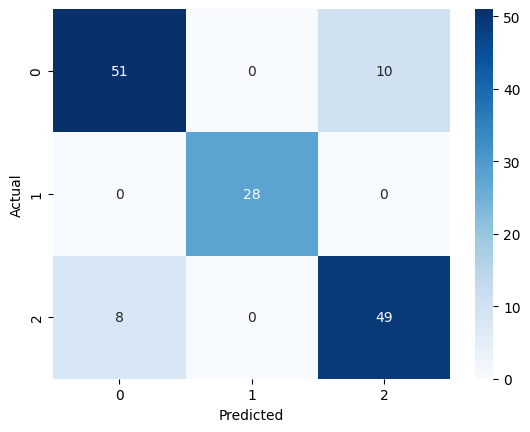


Random Forest — Validation Confusion Matrix


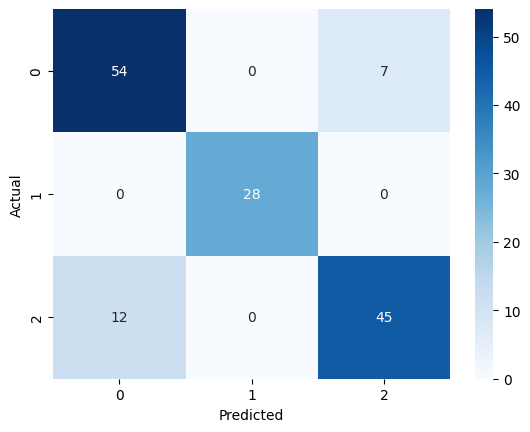


XGBoost — Validation Confusion Matrix


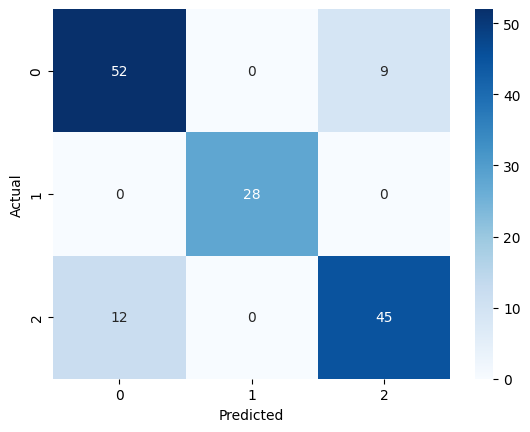

In [32]:
# Confusion Matrices

from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": val_pred_log,
    "Random Forest": val_pred_rf,
    "XGBoost": val_pred_xgb
}

for name, preds in models.items():
    print(f"\n{name} — Validation Confusion Matrix")
    cm = confusion_matrix(y_val_clf, preds)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

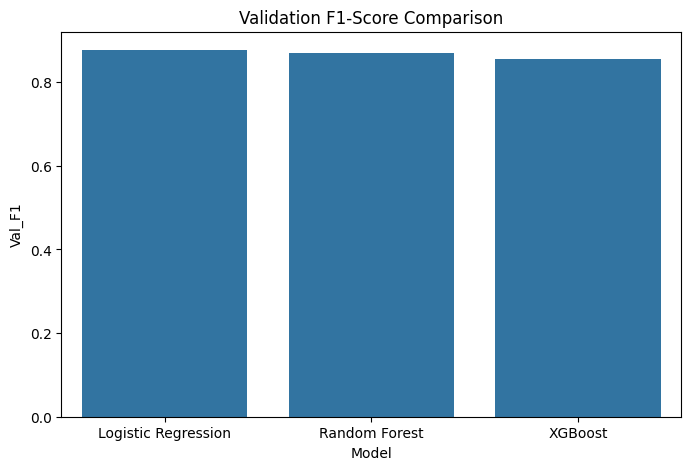

In [33]:
# F1-Score Comparison (Validation)

plt.figure(figsize=(8,5))
sns.barplot(data=clf_results, x="Model", y="Val_F1")
plt.title("Validation F1-Score Comparison")
plt.show()

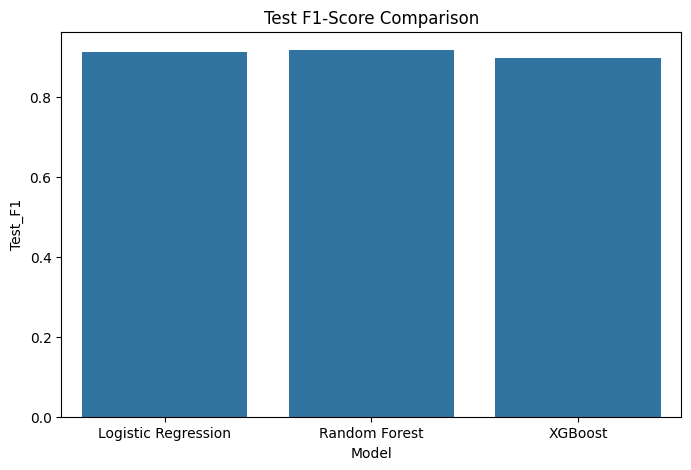

In [34]:
# F1-Score Comparison (Test)

plt.figure(figsize=(8,5))
sns.barplot(data=clf_results, x="Model", y="Test_F1")
plt.title("Test F1-Score Comparison")
plt.show()

In [46]:
import joblib

# Save best regression model
joblib.dump({
    "model": xgb_reg,
    "preprocessor": preprocessor_reg,
    "features": X_reg.columns.tolist()
}, "best_regressor.pkl")

# Save best classification model
joblib.dump({
    "model": xgb_clf,
    "preprocessor": preprocessor_clf,
    "features": X_clf.columns.tolist(),
    "class_mapping": class_mapping
}, "best_classifier.pkl")

print("Models saved successfully!")

Models saved successfully!
